## Import Libraries and Modules

In [951]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 1. Load Datasets

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat.csv) and Portuguese language (por.csv).

Link: https://www.kaggle.com/datasets/henryshan/student-performance-prediction?select=mat2.csv, https://archive.ics.uci.edu/dataset/320/student+performance

In [954]:
# Load Datasets
math_data = pd.read_csv('student-mat.csv', usecols=lambda col: col != 'Unnamed: 0')
portuguese_data = pd.read_csv('student-por.csv', usecols=lambda col: col != 'Unnamed: 0')

# Add a subject identifier column
math_data['Subject'] = 'Math'
portuguese_data['Subject'] = 'Portuguese'

# Merge 2 subjects dataframes
student_df = pd.concat([math_data, portuguese_data], ignore_index=True)
student_df.rename(columns={'G3': 'Final_Grade'}, inplace=True)

# Reorder columns to place Subject before Final_Grade
columns = list(student_df.columns)
columns.remove('Subject')
columns.remove('Final_Grade')
columns = ['Subject'] + columns + ['Final_Grade']
student_df = student_df[columns]

student_df.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,Math,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,Math,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,Math,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,Math,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,Math,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [956]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject      1044 non-null   object
 1   school       1044 non-null   object
 2   sex          1044 non-null   object
 3   age          1044 non-null   int64 
 4   address      1044 non-null   object
 5   famsize      1044 non-null   object
 6   Pstatus      1044 non-null   object
 7   Medu         1044 non-null   int64 
 8   Fedu         1044 non-null   int64 
 9   Mjob         1044 non-null   object
 10  Fjob         1044 non-null   object
 11  reason       1044 non-null   object
 12  guardian     1044 non-null   object
 13  traveltime   1044 non-null   int64 
 14  studytime    1044 non-null   int64 
 15  failures     1044 non-null   int64 
 16  schoolsup    1044 non-null   object
 17  famsup       1044 non-null   object
 18  paid         1044 non-null   object
 19  activities   1044 non-null 

## 2. Pre process the data

In [959]:
# Handle missing values
print('Number of rows before dropping the rows with missing values: ', len(student_df))
student_df = student_df.dropna()
print('Number of rows after dropping the rows with missing values: ', len(student_df))

Number of rows before dropping the rows with missing values:  1044
Number of rows after dropping the rows with missing values:  1044


In [961]:
# Encode categorical variables
student_df_scaled = student_df.copy()
categorical_cols = student_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    student_df_scaled[col] = le.fit_transform(student_df[col])

In [963]:
student_df.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,Math,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,Math,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,Math,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,Math,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,Math,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [965]:
student_df_scaled.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,0,0,0,18,1,0,0,4,4,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,0,17,1,0,1,1,1,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,0,15,1,1,1,1,1,0,...,4,3,2,2,3,3,10,7,8,10
3,0,0,0,15,1,0,1,4,2,1,...,3,2,2,1,1,5,2,15,14,15
4,0,0,0,16,1,0,1,3,3,2,...,4,3,2,1,2,5,4,6,10,10


In [967]:
student_df_temp = student_df_scaled.copy()
student_df_temp.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,0,0,0,18,1,0,0,4,4,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,0,17,1,0,1,1,1,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,0,15,1,1,1,1,1,0,...,4,3,2,2,3,3,10,7,8,10
3,0,0,0,15,1,0,1,4,2,1,...,3,2,2,1,1,5,2,15,14,15
4,0,0,0,16,1,0,1,3,3,2,...,4,3,2,1,2,5,4,6,10,10


In [969]:
# Scale numerical data
scaler = StandardScaler()
num_cols = student_df_scaled.select_dtypes(include=['int64', 'float64']).columns
student_df_scaled[num_cols] = scaler.fit_transform(student_df_scaled[num_cols])

In [971]:
student_df.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,Math,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,Math,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,Math,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,Math,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,Math,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [973]:
student_df_scaled.head()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
0,-1.28181,-0.593575,-0.875498,1.027889,0.612776,-0.643921,-2.761901,1.242077,1.466302,-1.629761,...,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,-1.382871
1,-1.28181,-0.593575,-0.875498,0.221035,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-1.629761,...,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,-1.382871
2,-1.28181,-0.593575,-0.875498,-1.392674,0.612776,1.552986,0.362069,-1.426089,-1.262431,-1.629761,...,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,-0.347391
3,-1.28181,-0.593575,-0.875498,-1.392674,0.612776,-0.643921,0.362069,1.242077,-0.352853,-0.826043,...,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,0.946958
4,-1.28181,-0.593575,-0.875498,-0.585820,0.612776,-0.643921,0.362069,0.352689,0.556724,-0.022325,...,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,-0.347391


## 3. Exploratory Data Analysis (EDA)

In [976]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Final_Grade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


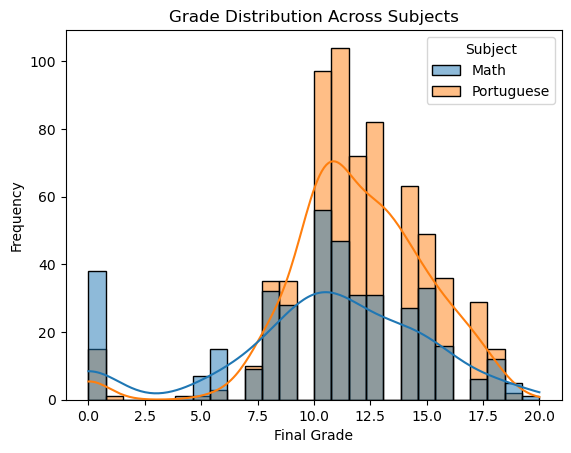

In [978]:
# Plot the grade distribution
sns.histplot(data=student_df, x='Final_Grade', hue='Subject', kde=True)
plt.title('Grade Distribution Across Subjects')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

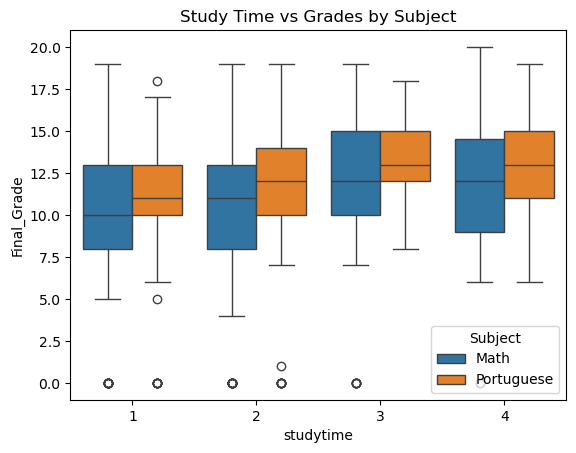

In [980]:
# Study time vs grades by subject
sns.boxplot(x='studytime', y='Final_Grade', hue='Subject', data=student_df)
plt.title('Study Time vs Grades by Subject')
plt.show();

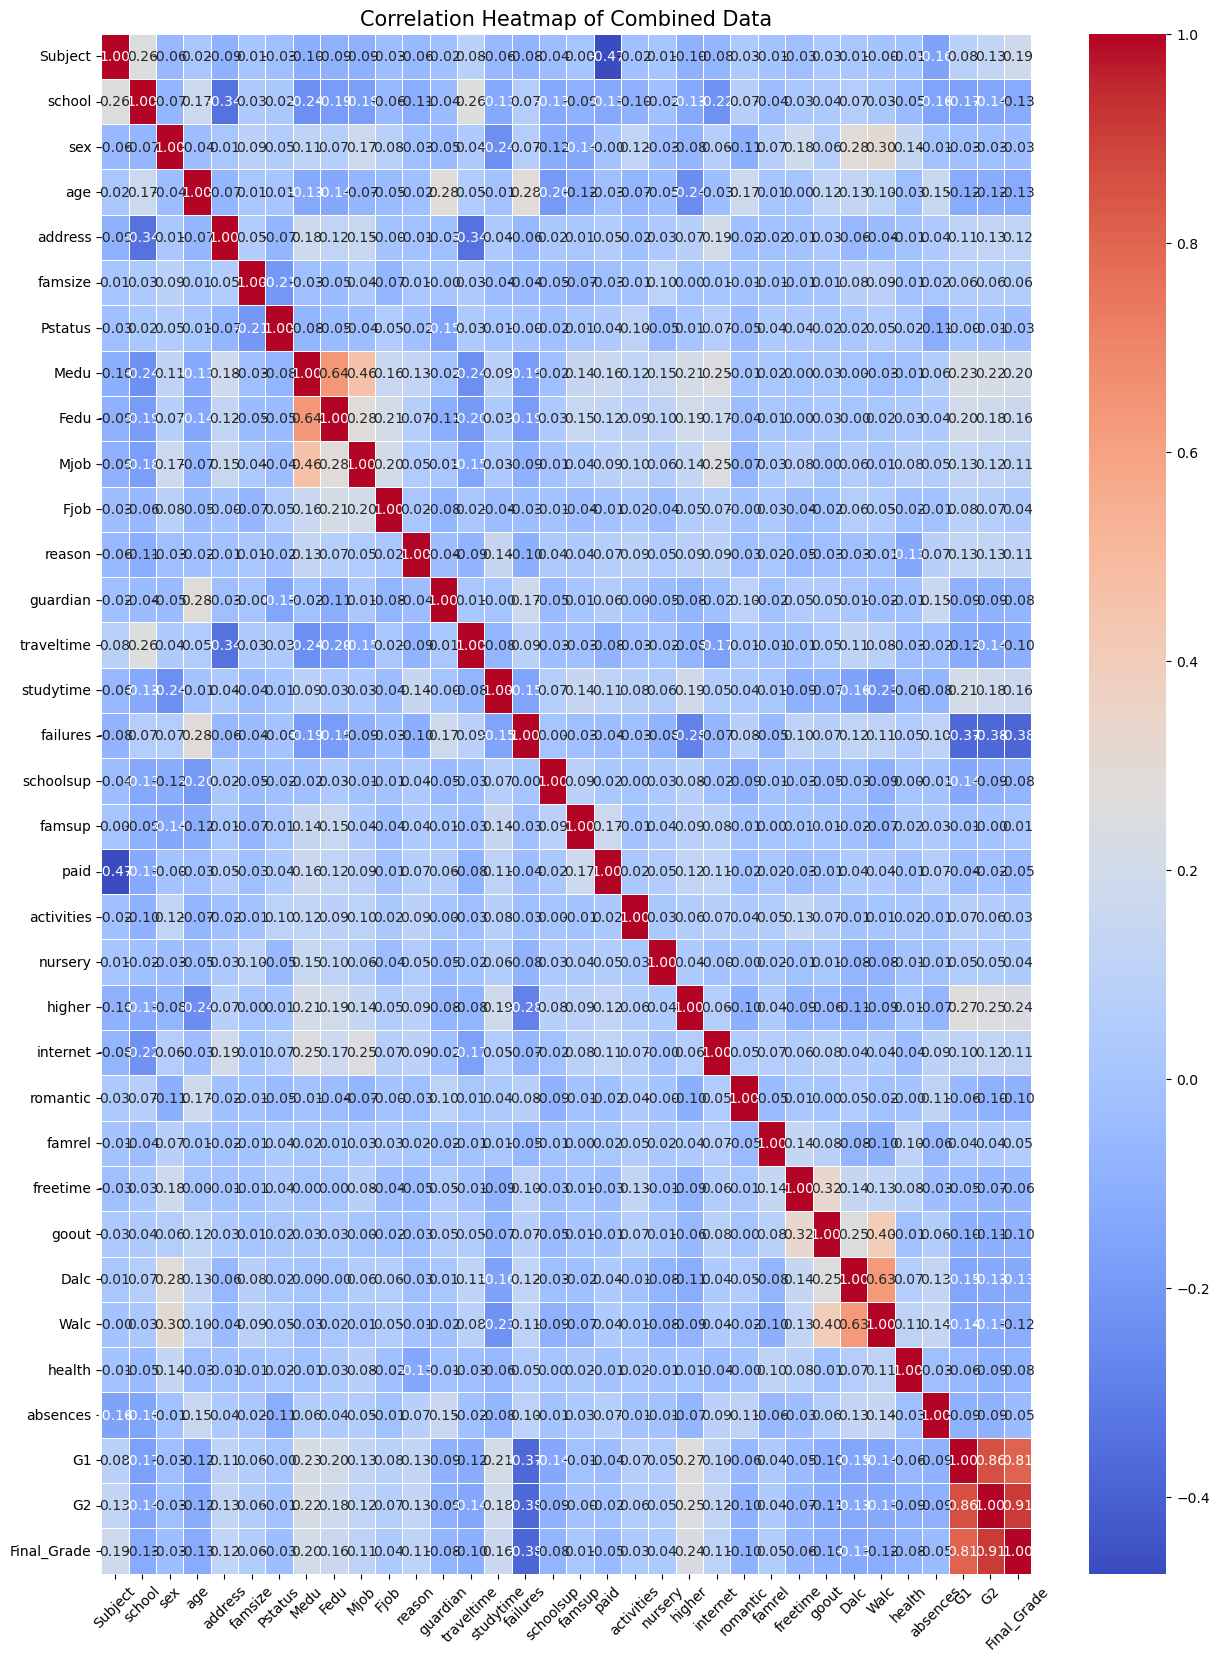

In [982]:
plt.figure(figsize=(15, 20))
sns.heatmap(student_df_temp.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Combined Data', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

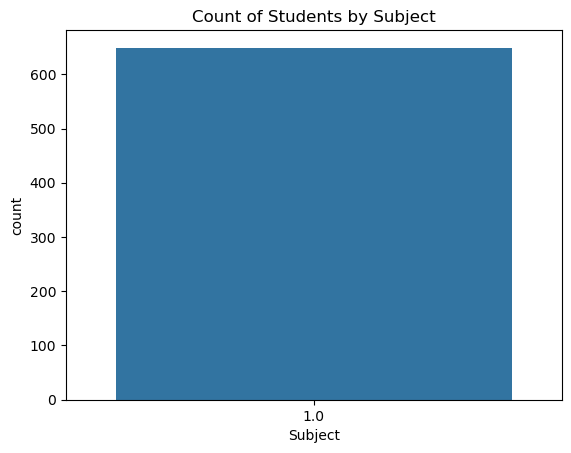

In [983]:
# Bar Graph: Count of Students by Subject
sns.countplot(x='Subject', data=student_df_unscaled)
plt.title('Count of Students by Subject')
plt.show()

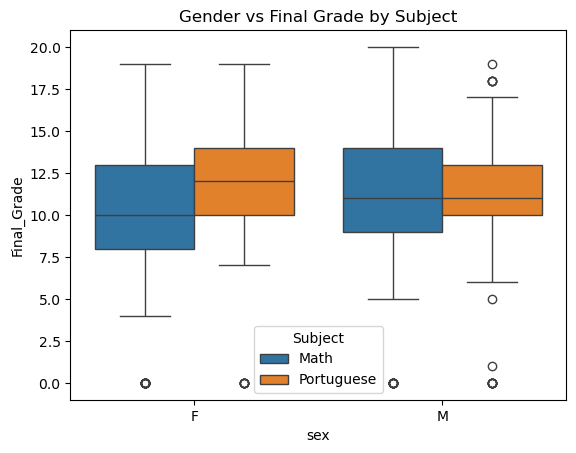

In [985]:
# Gender vs Final Grade
sns.boxplot(x='sex', y='Final_Grade', hue='Subject', data=student_df)
plt.title('Gender vs Final Grade by Subject')
plt.show()

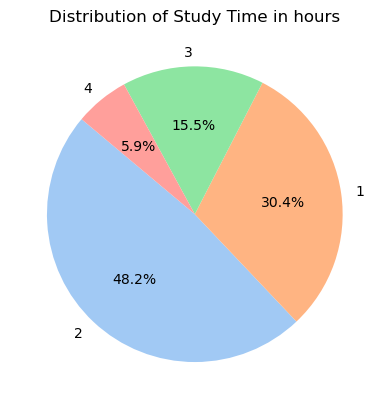

In [988]:
# Pie Chart: Distribution of Study Time
studytime_counts = student_df['studytime'].value_counts()
plt.pie(studytime_counts, labels=studytime_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Study Time in hours')
plt.show()

/var/folders/8t/6_2tyvpn4qlfkmtv66zk4xhw0000gn/T/ipykernel_42616/434390631.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='Final_Grade', data=student_df, ci=None)


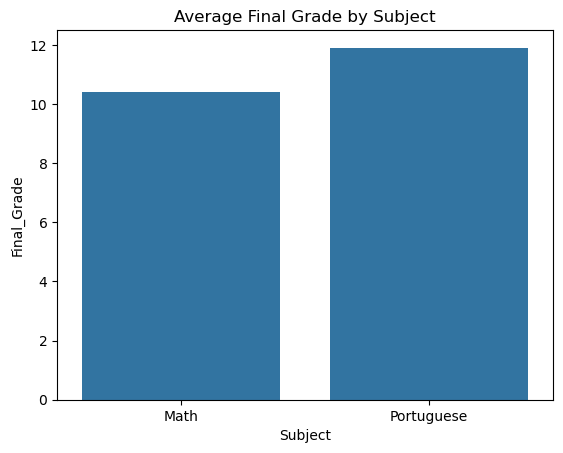

In [990]:
# Bar Graph: Average Final Grade by Subject
sns.barplot(x='Subject', y='Final_Grade', data=student_df, ci=None)
plt.title('Average Final Grade by Subject')
plt.show()

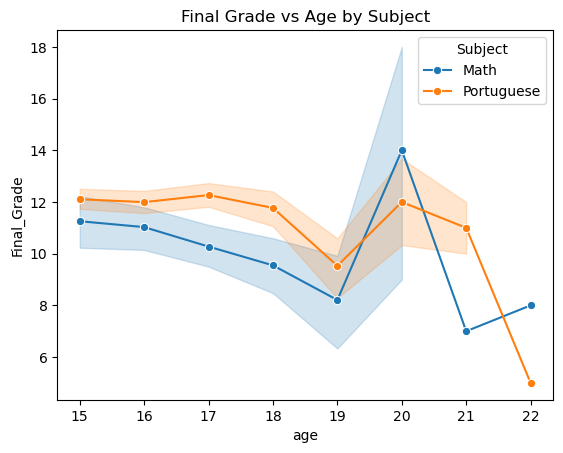

In [992]:
# Line Plot: Final Grade vs Age by Subject
sns.lineplot(x='age', y='Final_Grade', hue='Subject', data=student_df, marker='o')
plt.title('Final Grade vs Age by Subject')
plt.show()

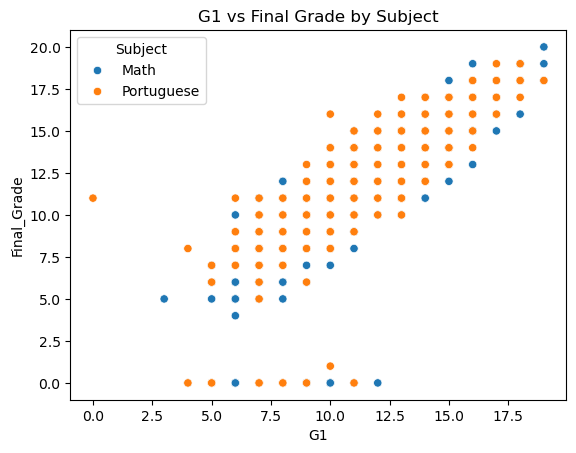

In [994]:
# Scatter Plot: G1 vs G3
sns.scatterplot(x='G1', y='Final_Grade', hue='Subject', data=student_df)
plt.title('G1 vs Final Grade by Subject')
plt.show()

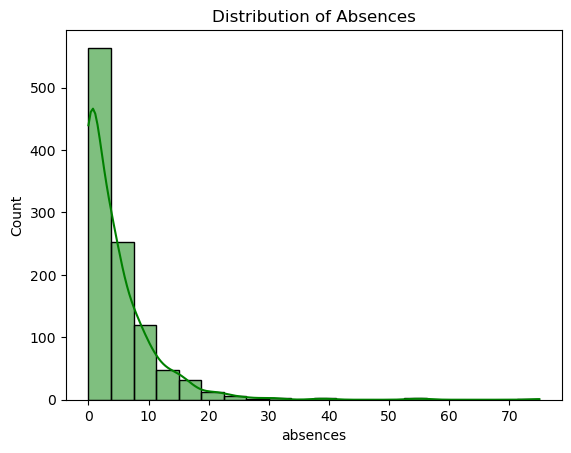

In [996]:
# Histogram: Distribution of Absences
sns.histplot(student_df['absences'], kde=True, bins=20, color='green')
plt.title('Distribution of Absences')
plt.show()

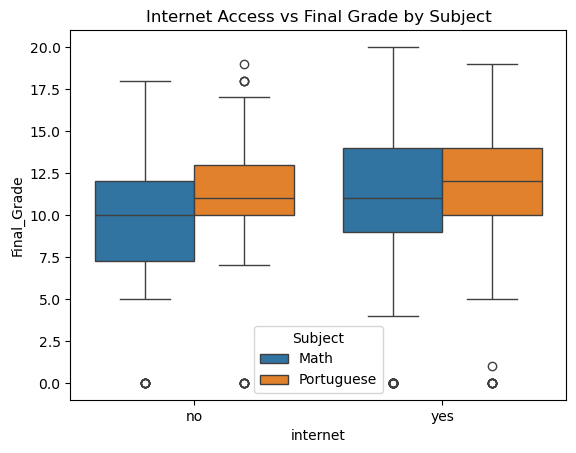

In [998]:
# Box Plot: Internet Access vs Final Grade
sns.boxplot(x='internet', y='Final_Grade', hue='Subject', data=student_df)
plt.title('Internet Access vs Final Grade by Subject')
plt.show()

Average Final Grade by Study Time:
studytime
1    10.580442
2    11.335984
3    12.493827
4    12.274194
Name: Final_Grade, dtype: float64


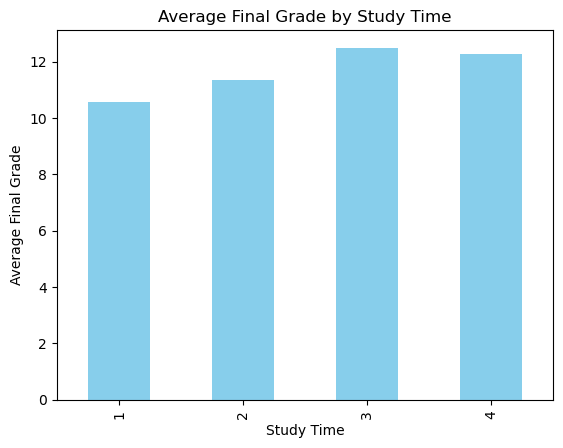

In [1000]:
# Group By and Aggregations
# Average Final Grade by Study Time
avg_grade_by_studytime = student_df.groupby('studytime')['Final_Grade'].mean()
print("Average Final Grade by Study Time:")
print(avg_grade_by_studytime)

# Plot: Average Grade by Study Time
avg_grade_by_studytime.plot(kind='bar', color='skyblue', title='Average Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average Final Grade')
plt.show()

In [1002]:
# Average Final Grade by Subject
avg_grade_by_subject = student_df.groupby('Subject')['Final_Grade'].mean()
print("Average Final Grade by Subject:")
print(avg_grade_by_subject)

Average Final Grade by Subject:
Subject
Math          10.415190
Portuguese    11.906009
Name: Final_Grade, dtype: float64


Total Absences by Subject:
Subject
Math          2255
Portuguese    2375
Name: absences, dtype: int64


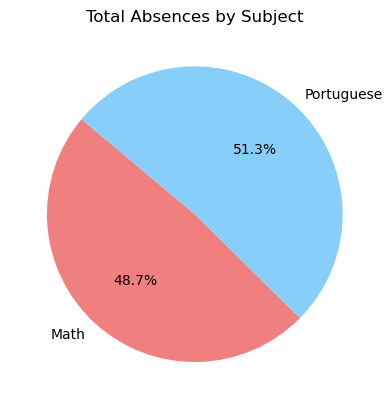

In [1004]:
# Total Absences by Subject
total_absences_by_subject = student_df.groupby('Subject')['absences'].sum()
print("Total Absences by Subject:")
print(total_absences_by_subject)

# Plot: Total Absences by Subject
total_absences_by_subject.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'], title='Total Absences by Subject')
plt.ylabel('')
plt.show()

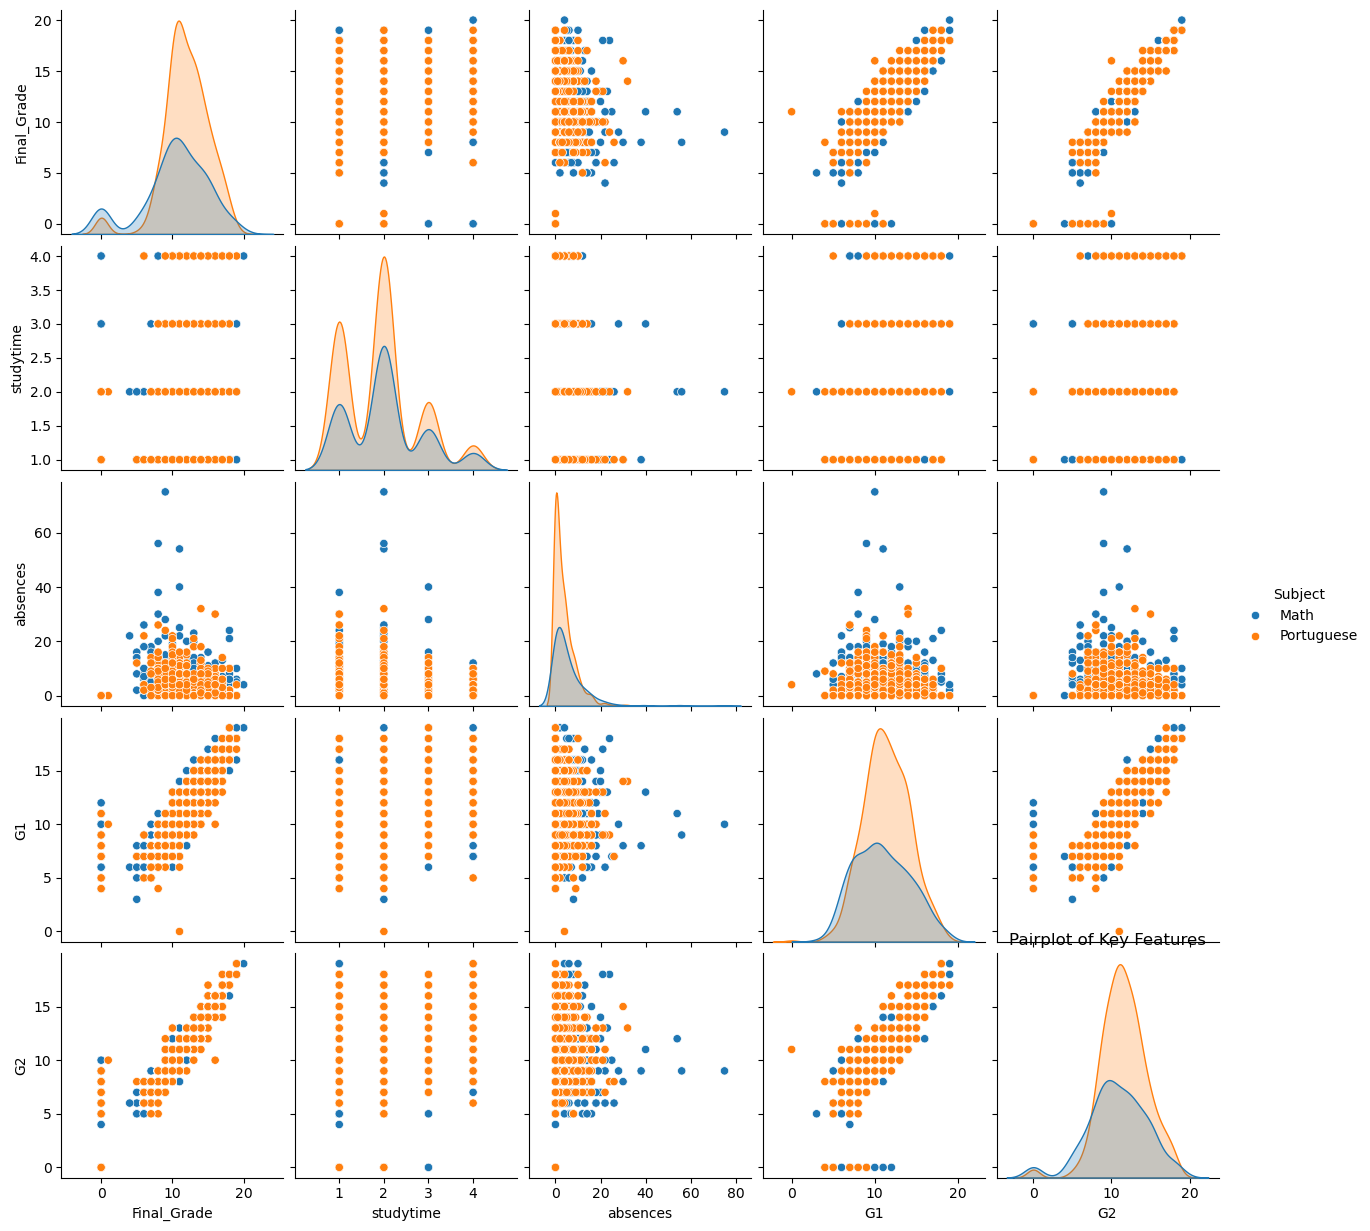

In [1006]:
# Pairplot: Key Features
sns.pairplot(student_df[['Final_Grade', 'studytime', 'absences', 'G1', 'G2', 'Subject']], hue='Subject')
plt.title('Pairplot of Key Features')
plt.show()

## 4. Modeling on the Data

In [1009]:
# Define fetaures and targets
X = student_df_scaled.drop(['Final_Grade', 'Subject'], axis=1)
y = pd.get_dummies(student_df['Subject']).join(student_df[['Final_Grade']])

In [1011]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1013]:
# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [1015]:
# Predictions
y_pred = dt_regressor.predict(X_test)

In [1017]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor - Mean Squared Error: {mse}")
print(f"Decision Tree Regressor - Mean Absolute Error: {mae}")
print(f"Decision Tree Regressor - R2 Score: {r2}")

Decision Tree Regressor - Mean Squared Error: 1.9250398724082938
Decision Tree Regressor - Mean Absolute Error: 0.6395534290271132
Decision Tree Regressor - R2 Score: -0.08203866786978538


## 5. Comparison of Models

In [1020]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Store results
results = {}

In [1022]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae,'MSE': mse, 'R2': r2}
    print(f"{name} - Mean Absolute Error: {mae}, Mean Squared Error: {mse}, R2 Score: {r2}")

Linear Regression - Mean Absolute Error: 0.5587837261190467, Mean Squared Error: 1.1586532932163747, R2 Score: 0.48017815681505166
Decision Tree - Mean Absolute Error: 0.6395534290271132, Mean Squared Error: 1.9250398724082938, R2 Score: -0.08203866786978538
Random Forest - Mean Absolute Error: 0.5653730918204602, Mean Squared Error: 1.07697671864998, R2 Score: 0.4132720543761179


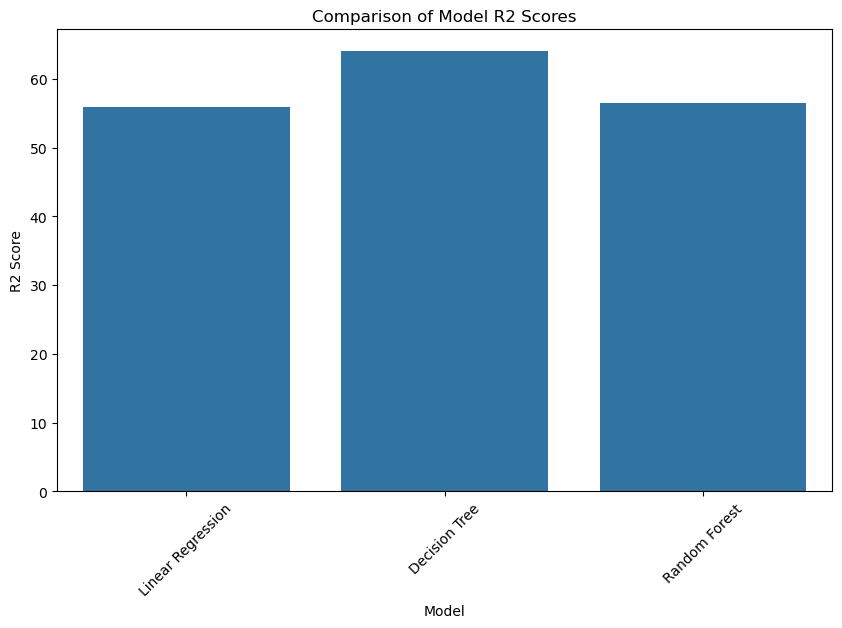

In [1024]:
# Compare model performances
model_names = list(results.keys())
mae_scores = [results[model]['MAE'] * 100 for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mae_scores)
plt.title('Comparison of Model R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

## 6. Hyperparameter Tuning and Cross-Validation

In [1035]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}


In [1053]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [1055]:
print("Best Hyperparameters:", grid_search.best_params_)
best_dt_regressor = grid_search.best_estimator_

Best Hyperparameters: {'criterion': 'poisson', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [1057]:
# Evaluate Best Model
y_pred_best = best_dt_regressor.predict(X_test)

In [1059]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Decision Tree Regressor - Mean Absolute Error: {mae_best}")
print(f"Best Decision Tree Regressor - Mean Squared Error: {mse_best}")
print(f"Best Decision Tree Regressor - R2 Score: {r2_best}")

Best Decision Tree Regressor - Mean Absolute Error: 0.5925315868204099
Best Decision Tree Regressor - Mean Squared Error: 1.2452001159503503
Best Decision Tree Regressor - R2 Score: 0.31176296903989636


In [1061]:
# Cross-validation with the best model
cv_scores = cross_val_score(best_dt_regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")


Cross-Validation R2 Scores: [ 0.25347933 -3.43031365  0.16951767  0.2461178   0.26604269]
Mean Cross-Validation R2 Score: -0.49903123192331156


## 7. Feature Importance

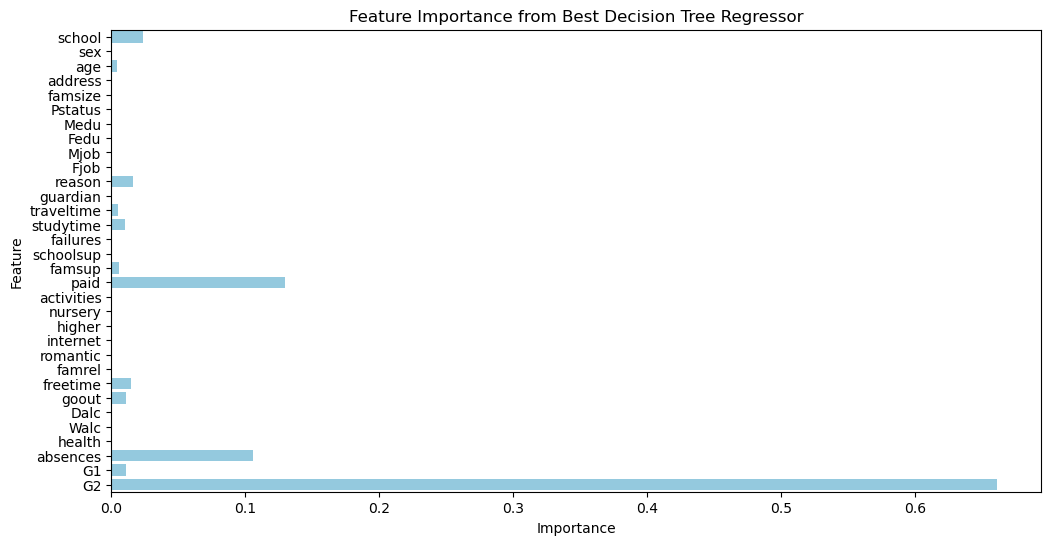

In [1064]:
# Plot Feature Importance for Best Decision Tree
feature_importances = best_dt_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_names, orient='h', color='skyblue')
plt.title('Feature Importance from Best Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
